In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('/kaggle/input/titanic1/train.csv')
data.head()     #print the 1st 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull() #see if there are any null values


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

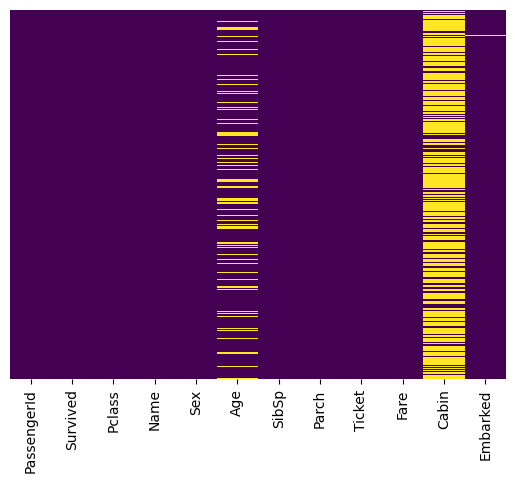

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#For the visualization of null values

<Axes: xlabel='Survived', ylabel='count'>

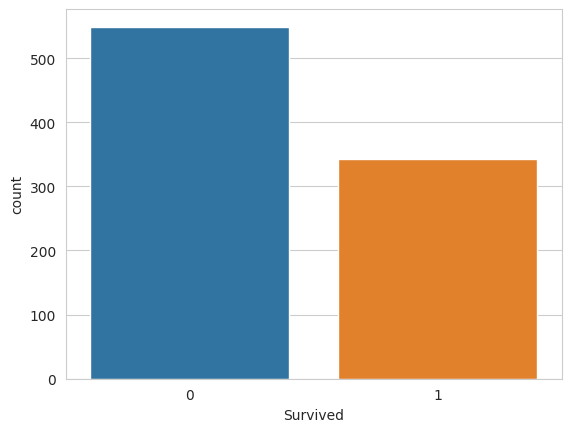

In [5]:
#Visulaizing the ratio of people that survived and that didn't:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=data)

We can see a lot of people didn't make it out alive. RIP...

<Axes: xlabel='Survived', ylabel='count'>

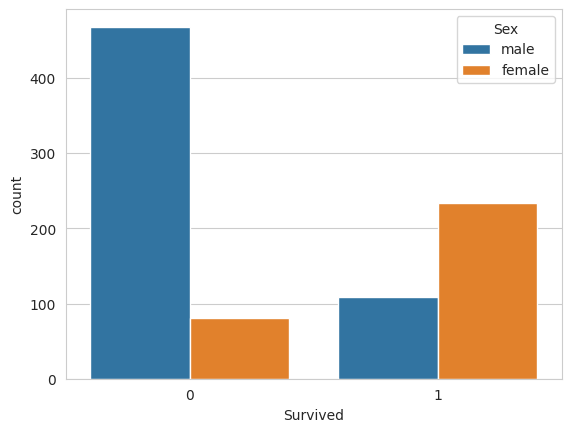

In [6]:
#Now, we see how many males survived and how many female survived:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex',data=data)

A lot of male died compared to the women.

<Axes: xlabel='Survived', ylabel='count'>

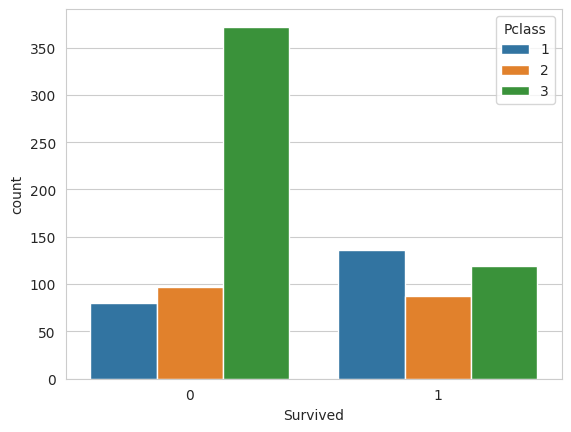

In [7]:
#Now we see the correlation between the "survival rate" and "passenger class":
#Class 1 means the highest and 3 means the lowest passenger class

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=data)

/tmp/ipykernel_30/583460964.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'].dropna(), bins=40)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

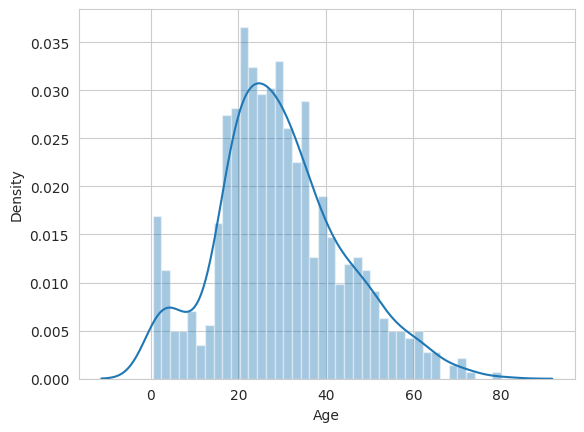

In [8]:
#We're now gonna see the distribution of the age, i.e. if it's normal or not.

sns.distplot(data['Age'].dropna(), bins=40)

It is kind of in the bell shape. 

<Axes: xlabel='Pclass', ylabel='Age'>

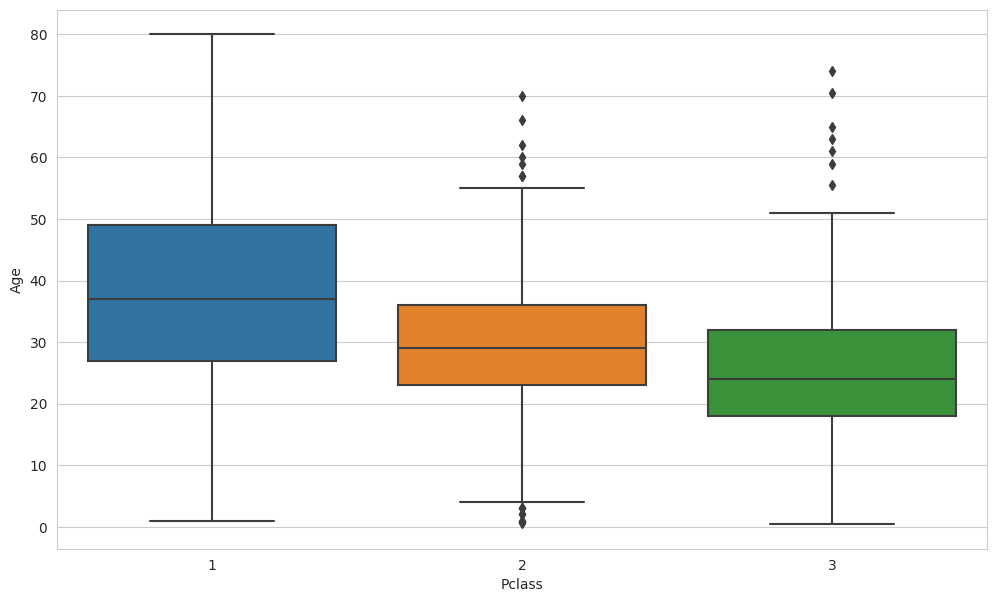

In [9]:
#Dealing with the null values:
#a/c to the above heatmap, the columns:age and Cabin had the most null values---so, we will deal with them

#An observation was made that, there is a corrlation between the age and class column. So, we will use that correlation and try to fill up the age column.

#First to find the replacing values, we use boxplot:

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y="Age", data= data)

We can see the average age of the people of class1= 37(approx.)
class2= 29
class3= 24

In [10]:
#Since we have figured out the correlation, we can replace the Null values in Age column by these:

def new_age(cols):
    Age=cols[0]
    Pclass= cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37

        elif Pclass==2:
            return 29

        else:
            return 24
    else:
        return Age

In [11]:
data['Age']= data[['Age','Pclass']].apply(new_age,axis=1)

/tmp/ipykernel_30/2829198181.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
/tmp/ipykernel_30/2829198181.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass= cols[1]


<Axes: >

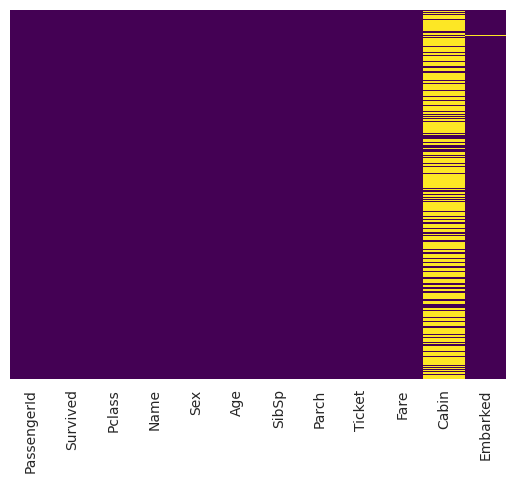

In [12]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [13]:
#Cabin column however has more than 80% null values, so it's better to just drop it.

data.drop('Cabin',axis=1, inplace=True)

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
# Fill missing 'Embarked' with the mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [16]:
data.info()    #no more missing values in any feature column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
#Time to deal with the categorical features:

pd.get_dummies(data['Embarked'],drop_first=True).astype(int)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [18]:
sex= pd.get_dummies(data['Sex'], drop_first=True).astype(int)
embark= pd.get_dummies(data['Embarked'], drop_first=True).astype(int)

In [19]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [20]:
data.drop(['Sex', 'Embarked','Name','Ticket'], axis=1, inplace=True)



In [21]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [22]:
data=pd.concat([data, sex, embark],axis=1)
data.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Here, Survived is the feature that we aim to predict if we were to build a model----- so, that is the dependent variable. 
And the rest of the feature columns are independent features.

In [23]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')


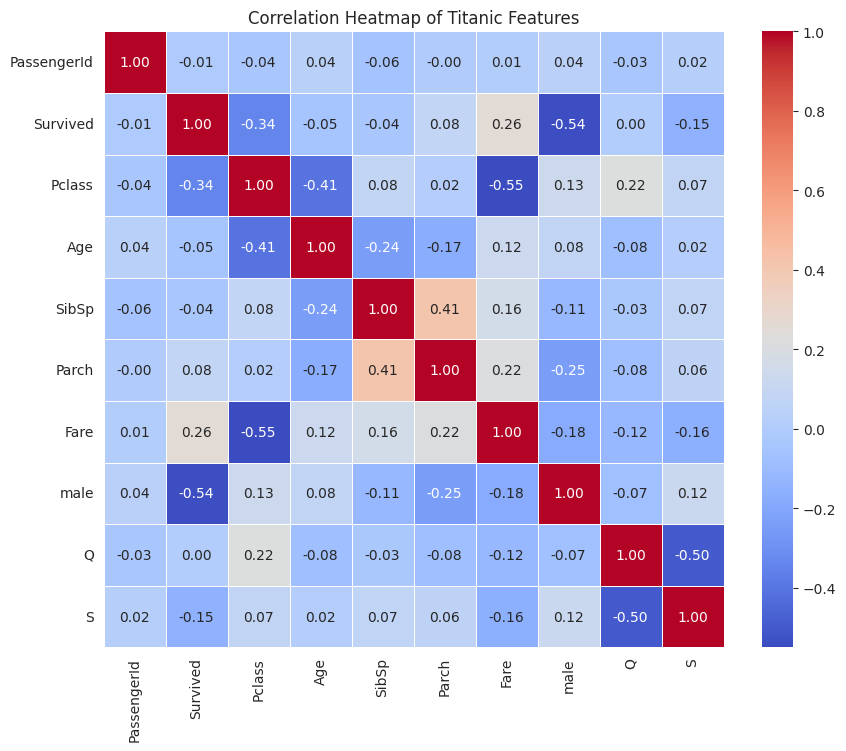

In [24]:
# Select relevant columns for the heatmap
columns_to_correlate = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 
                        'Parch', 'Fare', 'male', 'Q', 'S']

# Compute the correlation matrix
correlation_matrix = data[columns_to_correlate].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size for readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Features")
plt.show()

The final heatmap showing correlation between the columns.

In [25]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
data['Fare_Zscore'] = zscore(data['Fare'])
data['Age_Zscore'] = zscore(data['Age'])

# Identify outliers where Z-score > 3 or < -3
fare_outliers_z = data[abs(data['Fare_Zscore']) > 3]
age_outliers_z = data[abs(data['Age_Zscore']) > 3]

print(f"Number of outliers in Fare (Z-score): {len(fare_outliers_z)}")
print(f"Number of outliers in Age (Z-score): {len(age_outliers_z)}")


Number of outliers in Fare (Z-score): 20
Number of outliers in Age (Z-score): 7


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


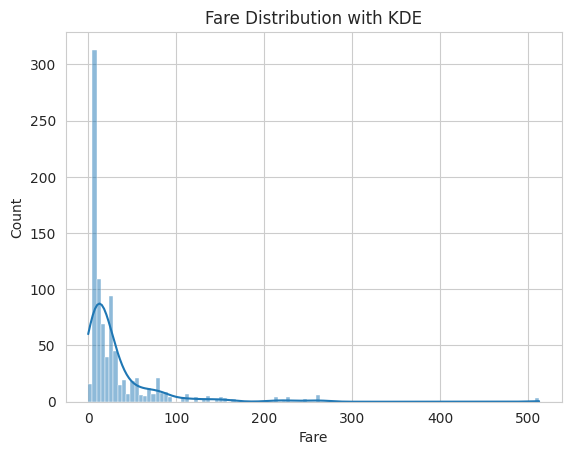

In [26]:
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution with KDE')
plt.show()

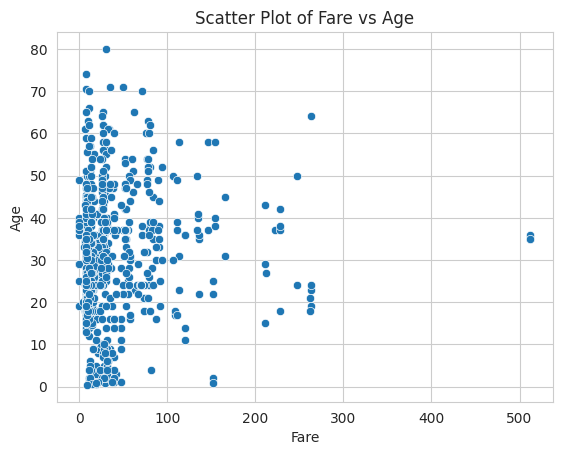

In [27]:
sns.scatterplot(x='Fare', y='Age', data=data)
plt.title('Scatter Plot of Fare vs Age')
plt.show()

In [28]:
Q1 = data['Fare'].quantile(0.25)  # 25th percentile
Q3 = data['Fare'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
lower_bound = Q1 - 1.5 * IQR


In [29]:
data = data[(data['Fare'] >= lower_bound) & (data['Fare'] <= upper_bound)]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


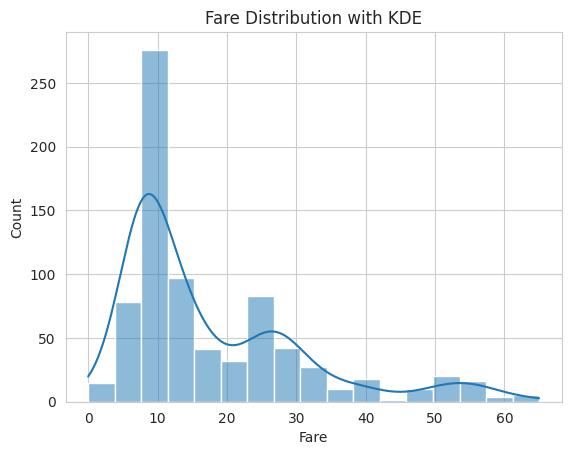

In [30]:
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution with KDE')
plt.show()

Hence, outliers are eliminated from the fare feature column.